In [1]:
# Title:     SmartHome Dataset
# Authors:   Aline J
# Date:      01/06/2020
# Goal:      Analyze and predict energy use efficiency 
#            in a smarthouse during a year under variable weather conditions.

# Questions: 
# 1) What are the variables that control generated energy? 
# 2) What are the variables that control used energy? 
# 3) What are the variables that control energy efficiency?

# Method. Unsupervised Machine learning Method, specifically random forest regression analysis.
# Results: Used CleanData
#         Several attempts to run the analysis were done at differen frequencies. 
#         Only Monthly frequency data resulted the highest accuracy (76%) vs Minute data (0.01%).  
#         The minimum random state of 50, were enough to explain the variability in the dataset.  
#         The same accuracy was yield when running random state of 1000.


In [2]:
### Begins Here ####
# 1. Import dependencies
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [1]:
# Other dependencies
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_path = "Data/CleanData_per_day.csv"
df = pd.read_csv(csv_path,   parse_dates=True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 351 rows and 26 columns


In [3]:
df.head(12)

,month,day,year,gen,use,House overall,Furnace,Home office,Living room,Wine cellar,...,Dishwasher,Temperature,Humidity,Visibility,ApparentTemperature,Pressure,WindSpeed,windBearing,Precip,DewPoint
0,1,1,2016,18.026200,1366.269517,1366.269517,492.020017,64.668783,77.071667,29.093367,...,59.517171,40727.34,720.28,11125.60,33989.34,1156803.96,8420.92,300606,0.1276,27849.26
1,1,2,2016,76.051300,1851.521067,1851.521067,683.761967,145.570317,71.142950,24.096767,...,63.154404,45637.30,835.28,14333.36,35226.44,1460895.76,11733.58,380922,0.0000,26637.98
2,1,3,2016,74.081433,1651.128133,1651.128133,613.630533,196.064167,42.779250,32.989533,...,105.508668,47914.02,883.58,14400.00,38548.42,1453861.98,10967.42,327054,0.0000,30604.26
3,1,4,2016,108.525017,1500.686017,1500.686017,605.129767,180.650867,93.077467,20.980700,...,58.880760,32108.72,861.98,14119.28,15936.88,1463662.42,16165.70,460508,0.0000,14835.90
4,1,5,2016,148.107500,1597.968867,1597.968867,817.065250,133.360867,44.483650,30.792300,...,72.973254,17208.20,770.82,14394.78,3973.98,1489091.46,9592.18,419634,0.0000,-3292.16
5,1,6,2016,136.922033,1267.262700,1267.262700,685.990133,167.216517,47.648100,19.105800,...,0.140792,28765.20,825.10,14330.40,22724.60,1486863.08,5726.98,312532,0.0000,7985.04
6,1,7,2016,111.077217,1388.444150,1388.444150,568.106683,146.354700,75.690783,29.777033,...,68.746322,33599.04,895.74,14287.20,31265.42,1477864.54,3576.78,198706,0.0000,15923.34
7,1,8,2016,31.267217,1584.852233,1584.852233,630.874083,159.989967,69.618500,25.382883,...,62.607221,42463.28,1033.16,14205.98,35261.18,1475104.86,7083.10,52432,0.0000,30723.44
8,1,9,2016,27.691133,1303.707900,1303.707900,553.466300,113.336783,55.883617,26.653533,...,0.094325,54431.36,1148.64,12903.56,50012.22,1472674.60,6061.94,91426,0.0000,46180.16
9,1,10,2016,8.630967,1638.143817,1638.143817,448.871300,159.419217,89.310450,27.882550,...,59.463244,65328.62,1212.90,10617.86,60219.90,1442159.72,12076.34,219432,36.0238,58692.02


In [4]:
# Data Preparation
df.columns
#df.dtypes 
#CleanData.tail()

Index(['month', 'day', 'year', 'gen', 'use', 'House overall', 'Furnace',
       'Home office', 'Living room', 'Wine cellar', 'Garage door', 'Kitchen',
       'Barn', 'Well', 'Fridge', 'Microwave', 'Dishwasher', 'Temperature',
       'Humidity', 'Visibility', 'ApparentTemperature', 'Pressure',
       'WindSpeed', 'windBearing', 'Precip', 'DewPoint'],
      dtype='object')

In [5]:
inputdf = df.filter(items=[ 'month', 'day', 'year', 'gen', 'Furnace',
                            'Home office', 'Living room', 'Wine cellar', 'Garage door', 'Kitchen',
                            'Barn', 'Well', 'Fridge', 'Microwave', 'Dishwasher', 'Temperature',
                            'Humidity', 'Visibility', 'ApparentTemperature', 'Pressure',
                            'WindSpeed', 'windBearing', 'Precip', 'DewPoint'])

In [6]:
# Running RF with all the data to investigate the driving variables of energy efficiency at a 1min resolution
#my_data.dtypes 
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
features.columns

Index(['month', 'day', 'year', 'gen', 'Furnace', 'Home office', 'Living room',
       'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well', 'Fridge',
       'Microwave', 'Dishwasher', 'Temperature', 'Humidity', 'Visibility',
       'ApparentTemperature', 'Pressure', 'WindSpeed', 'windBearing', 'Precip',
       'DewPoint'],
      dtype='object')

In [7]:
# Labels are the values we want to predict
labels = np.array(features['gen'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('gen', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [8]:
# Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (263, 23)
Training Labels Shape: (263,)
Testing Features Shape: (88, 23)
Testing Labels Shape: (88,)


In [10]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Temperature')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  72091.54


In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Train the model on training data
rf.fit(train_features, train_labels);

In [12]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 8453.46 degrees

Mean Absolute Error: 42.34 degrees.


In [15]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 95.96 %. 
np.mean(mape )

Accuracy: 1.79 %.


98.21275234024387

In [16]:
# What are the top predictor variables that regulate power generated in a smarthome?
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [17]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [18]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Temperature          Importance: 0.11
Variable: ApparentTemperature  Importance: 0.09
Variable: Garage door          Importance: 0.08
Variable: Wine cellar          Importance: 0.07
Variable: Humidity             Importance: 0.06
Variable: Pressure             Importance: 0.06
Variable: month                Importance: 0.05
Variable: Home office          Importance: 0.05
Variable: day                  Importance: 0.04
Variable: Furnace              Importance: 0.04
Variable: Well                 Importance: 0.04
Variable: Dishwasher           Importance: 0.04
Variable: Visibility           Importance: 0.04
Variable: Living room          Importance: 0.03
Variable: Barn                 Importance: 0.03
Variable: Fridge               Importance: 0.03
Variable: Microwave            Importance: 0.03
Variable: windBearing          Importance: 0.03
Variable: DewPoint             Importance: 0.03
Variable: Kitchen              Importance: 0.02
Variable: WindSpeed            Importanc

In [19]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=1000)
# Extract the two most important features
important_indices = [feature_list.index('ApparentTemperature'), feature_list.index('Temperature')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

#Note:
#This tells us that temperature and dew point are the two most important variables to regulate generated energy 

Mean Absolute Error: 49.95 degrees.
Accuracy: -6.16 %.


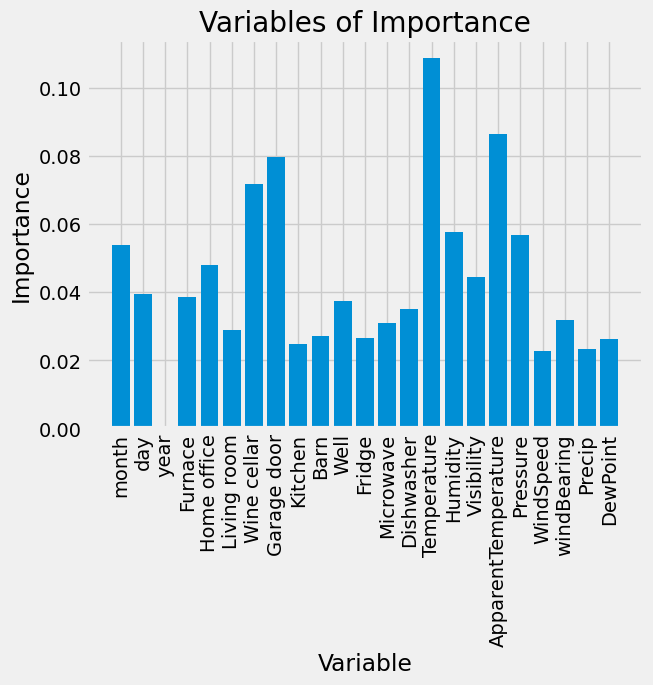

In [20]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x=sorted(feature_importances, key = lambda x: x[1], reverse = True)
x_values = sorted(list(range(len(x))))

#x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variables of Importance');

In [21]:
# Save the model
#model.save("EnergyGenerated_trained.h5")


In [22]:
# Dates of training values
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

In [23]:
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [24]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

In [25]:
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

In [26]:
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

In [27]:
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

In [28]:
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 60

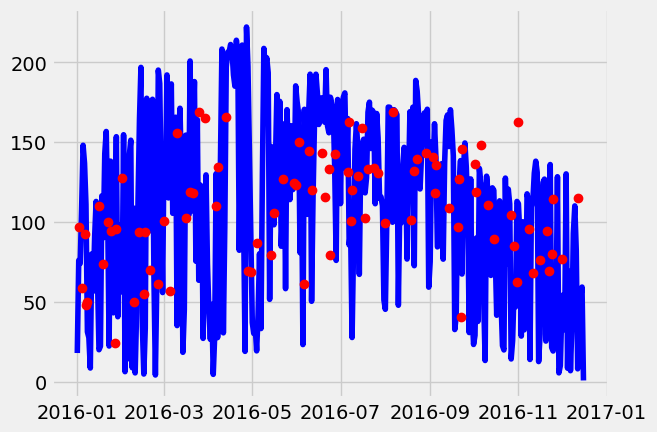

In [29]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Generated Energy'); plt.title('Actual and Predicted Values');

In [30]:
feature_list.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [31]:
# Make the data accessible for plotting
true_data['gen'] = features[:, feature_list.index('gen')]
#true_data['Temperature'] = features[:, feature_list.index('Temperature')]
#true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
#plt.plot(true_data['date'], true_data[''], 'y-', label  = 'temp_1', alpha = 1.0)
#plt.plot(true_data['date'], true_data['Temperature'], 'k-', label = 'Temperature', alpha = 0.8)
#plt.plot(true_data['date'], true_data['Humidity'], 'r-', label = 'Humidity', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

ValueError: 'gen' is not in list